# Table of Contents

- [Importing our Libraries](#1.1)
- [Importing our Data](#2.1)
- [Initial Simple Linear Regression Baseline Model](#3.1)
- [Initial Data Cleaning](#4.1)
    - [Dropping Outliers in our Target](#4.2)
    - [Dropping Features that do not Pertain to the Business Question](#4.3)
    - [Dropping Outliers in our Predictor Variables](#4.4)
- [Numerical Data](#5.1)
    - [Creating a DataFrame with just continuous numerical data](#5.2)
    - [Second Simple Linear Regression Model  (After Dropping Outliers in Sale Price)](#5.3)
    - [Checking for Multicollinearity](#5.4)
    - [Baseline Multi-Linear Regression Model](#5.5)
    - [Standardizing the Data to Determine Importance](#5.6)
    - [Checking Partial Regression Plots for our Model](#5.7)
    - [Checking for Linearity and Normal Distributions](#5.8)
        - [Log-Scaling all of the Predictor Variables](#5.8.1)
        - [Log-Scaling Target and Predictor Variables](#5.8.2)
        - [Log-Scaling the Target Variable](#5.8.3)
- [Categorical Data](#6.1)
    - [Setting up the Categorical DataFrame](#6.2)
    - [Running Models with Categorical Data](#6.3)
        - [Modeling Nuisance](#6.3.1)
        - [Modeling House Condition](#6.3.2)
        - [Modeling Heatsource](#6.3.3)
        - [Modeling House Grade](#6.3.4)
- [Modeling Numerical Data and Categorical Data](#7.1)
    - [Non-Standardized Model](#7.2)
    - [Standardizing the Final Model](#7.3)
- [Results](#8.1)
    - [Interpretation](#8.2)
    - [Recommendations](#8.3)
    - [Limitations](#8.4)
- [Additional Visualizations](#9.1)

# Importing our Libraries<a class="anchor" id="1.1"></a>

In [1]:
# Imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error

import num_model_all_combos as simple_test

`num_model_all_codes` is a custom module located in a .py file within this notebook. This module is needed for the notebook to run.

We are tasked with taking the housing data from King County, WA and using statistical testing and linear regression to define a model that highlights the most relevant renovations to changes in home price.

# Importing our Data<a class="anchor" id="2.1"></a>

In [2]:
# creating initial data frame
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
# checking original df
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052


In [4]:
df.shape

(30155, 25)

In [5]:
# checking for nulls
df.isna().sum().sum()

46

In [6]:
# dropping nulls
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Our original dataset had 25 features describing 30,155 rows of housing sets. There were 46 rows with null data that were dropped during the cleaning process, leaving us with 30,111 rows of housing set data to use for our model.

Of the 25 features, dtypes included: 10 object, 10 int, and 5 float. We further explain and reduce the features below.

# Initial Simple Linear Regression Baseline Model<a class="anchor" id="3.1"></a>

To get an initial understanding of our data, we are building a baseline model based on the feature `sqft_living` since it has the highest correlation to our target feature: `price`.

In [9]:
# Checking correlation to price
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
lat              0.063430
long            -0.022278
id              -0.034096
Name: price, dtype: float64

In [10]:
# creating baseline model based on highest .corr() to price (ran above)
X = df[['sqft_living']]
y = df['price']

model = sm.OLS(y, sm.add_constant(X)).fit()
# viewing the baseline model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:22:44   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      0.000   -9.48e+04   -5.64e+04
sqft_living   560.5134      4.211    133.096      0.000     552.259     568.768
==============================================================================
Omnibus:                    43384.874   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47187801.072
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.242   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our first simple-linear regression model has an R-squared value of .37. This model represents only 37% of the variance found in housing prices. Our model is statistically significant with an F-statistic p-value less than our alpha of 0.05. The constant coefficient and predictor variable coefficient are also statistically significant when compared to our alpha.

# Initial Data Cleaning<a class="anchor" id="4.1"></a>

## Dropping Outliers in our Target<a class="anchor" id="4.2"></a>

We modeled the target data to check its shape and to determine whether there were outliers that could be affecting our data. After looking at histograms and box plots of `price`, it was decided to remove any values below the .3 percentile and above the 99.7 percentile.

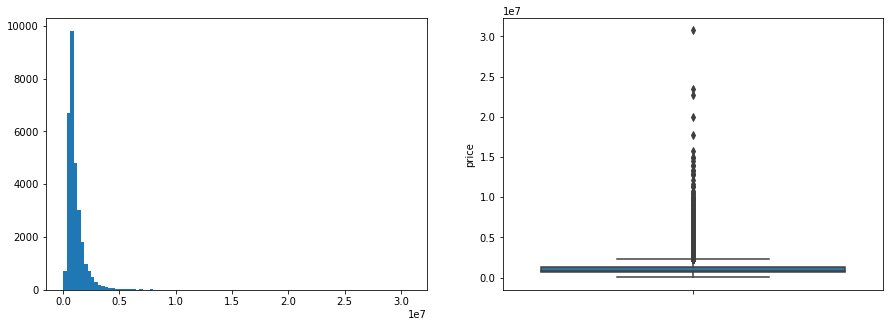

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.hist(df['price'], bins=100)
sns.boxplot(y =df['price']);

In [12]:
# Dropping outliers to within 3 standard deviations
df_no_outliers = df[(df['price'] > np.percentile(df['price'], .3)) 
                    & (df['price'] < np.percentile(df['price'], 99.7))]

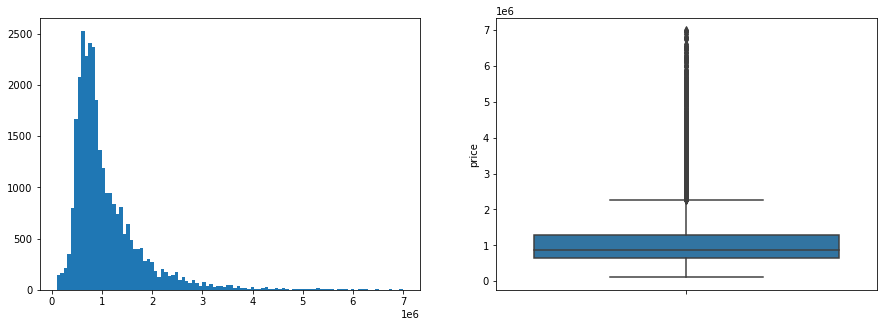

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.hist(df_no_outliers['price'], bins=100)
sns.boxplot(y =df_no_outliers['price']);

In [14]:
df_no_outliers.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.992700e+04,2.992700e+04,29927.000000,29927.000000,29927.000000,2.992700e+04,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000
mean,4.541369e+09,1.084893e+06,3.413673,2.330888,2105.252448,1.657447e+04,1.543222,1804.699368,473.342533,329.974338,215.996959,1975.169746,89.750627,47.328459,-121.321354
std,2.882145e+09,7.201688e+05,0.977299,0.877375,950.536144,5.997309e+04,0.567573,863.246578,572.185345,284.019578,242.024168,32.048907,413.920695,1.428233,5.714484
min,1.000055e+06,1.041860e+05,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.077450e+09,6.500000e+05,3.000000,2.000000,1420.000000,4.840000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.404785,-122.326340
50%,3.876002e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.460000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551305,-122.225740
75%,7.297200e+09,1.300000e+06,4.000000,3.000000,2610.000000,1.050700e+04,2.000000,2270.000000,940.000000,510.000000,312.000000,2003.000000,0.000000,47.670115,-122.116020
max,9.904000e+09,6.995000e+06,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,4520.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


## Dropping Features that do not Pertain to the Business Question<a class="anchor" id="4.3"></a>

To ensure that we stayed relevant to the question asked of us, the columns below were removed for a variety of reasons:

- Drop ID: Just a unique identifier, no helpful information.
- Drop address and lat/long: Location not important in this analysis.
- Drop year renovated and year built: Not relevant for remodeling purposes.
- Drop date: Last sale date is not relevant to remodeling home.
- Drop sq_ft lot: Cannot change lot size by remodeling home.
- Waterfront: Cannot change the house location to be moved next to water.
- Greenbelt: Cannot change the house location to be moved next to a greenbelt.
- View: Cannot change the house location to have a good view.
- Sewer System: Not likely to change your entire sewer system during a home remodel.

In [15]:
# Dropping columns that have little relationship to renovation
df_dropped = df_no_outliers.drop(['id', 'address', 'lat', 'long', 'yr_built', 
                                  'date', 'sqft_lot', 'waterfront', 'greenbelt',
                                  'view', 'yr_renovated', 'sewer_system'], axis = 1)

In [16]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 30154
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29927 non-null  float64
 1   bedrooms       29927 non-null  int64  
 2   bathrooms      29927 non-null  float64
 3   sqft_living    29927 non-null  int64  
 4   floors         29927 non-null  float64
 5   nuisance       29927 non-null  object 
 6   condition      29927 non-null  object 
 7   grade          29927 non-null  object 
 8   heat_source    29927 non-null  object 
 9   sqft_above     29927 non-null  int64  
 10  sqft_basement  29927 non-null  int64  
 11  sqft_garage    29927 non-null  int64  
 12  sqft_patio     29927 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 3.2+ MB


## Dropping Outliers in our Predictor Variables<a class="anchor" id="4.4"></a>

We modeled the predictor data to check its shape and to determine whether there were outliers that could be affecting our data. After looking atvisualizations, it was decided to remove any values below the .3 percentile and above the 99.7 percentile for the following features:

- `bedrooms`
- `sqft_living`
- `sqft_above`
- `sqft_patio`
- `sqft_garage`
- `sqft_basement`

In [17]:
df_dropped_no_outliers = df_dropped.copy()

outlier_check = ['bedrooms', 'sqft_living', 'sqft_above', 
                 'sqft_patio', 'sqft_garage', 'sqft_basement']


for col in outlier_check:
    df_dropped_no_outliers = df_dropped_no_outliers[(df_dropped_no_outliers[col] 
                                                     > np.percentile(df_dropped_no_outliers[col], .3))
                                                    & (df_dropped_no_outliers[col] 
                                                       < np.percentile(df_dropped_no_outliers[col], 99.7))]

# Numerical Data<a class="anchor" id="5.1"></a>

## Creating a DataFrame with Continuous Numerical Data<a class="anchor" id="5.2"></a>

To run an enhanced simple linear regression model and eventually run multi-linear regression models, we created a dataframe using only the numerical features in the dataset:

In [18]:
# # Creating new df with only numerical columns/dropping categorical columns
df_numeric = df_dropped_no_outliers.select_dtypes('number')

In [19]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7277 entries, 3 to 30153
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          7277 non-null   float64
 1   bedrooms       7277 non-null   int64  
 2   bathrooms      7277 non-null   float64
 3   sqft_living    7277 non-null   int64  
 4   floors         7277 non-null   float64
 5   sqft_above     7277 non-null   int64  
 6   sqft_basement  7277 non-null   int64  
 7   sqft_garage    7277 non-null   int64  
 8   sqft_patio     7277 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 568.5 KB


In [20]:
df_numeric.head(3)

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio
3,775000.0,3,3.0,2160,2.0,1090,1070,200,270
4,592500.0,2,2.0,1120,2.0,1120,550,550,30
11,680000.0,4,3.0,2130,1.0,1130,1100,440,280


## Second Simple Linear Regression Model  (After Dropping Outliers in Sale Price)<a class="anchor" id="5.3"></a>

We needed to run a second simple linear regression model after dropping our outliers to ensure that the model improved after making the changes. To compare the linear models against the simple correlation table run above, we use the function: `simple_num_model_all_combos`, found in the included .py file. This function runs a simple linear regression model on all predictor features in a dataframe against the specified target feature.

Now that the outliers in price have been dropped, our simple linear regression model has an R-squared value of .42, increased from the baseline results of .37.

In [21]:
simple_df = simple_test.simple_num_model_all_combos(df_numeric, 'price')

In [22]:
simple_df

,column,r2,r2_adj,f_stat_p_val,const_coefs,const_p_val,predictor_coef,predictor_p_val
2,sqft_living,0.421117,0.421037,0,-54020.5,0.00397499,534.791,0
4,sqft_above,0.394916,0.394833,0,83290,3.16681e-06,666.167,0
1,bathrooms,0.220791,0.220684,0,41411.9,0.126662,436985,0
7,sqft_patio,0.119937,0.119816,3.98166e-204,884121,0,1127.11,3.98166e-204
5,sqft_basement,0.100789,0.100666,4.36482e-170,598454,6.05052e-139,590.562,4.36482e-170
0,bedrooms,0.0961656,0.0960413,5.65256e-162,279709,1.16737e-15,259553,5.65256e-162
6,sqft_garage,0.0716212,0.0714936,1.3905e-119,705699,2.71733e-189,1112.48,1.3905e-119
3,floors,0.0465202,0.0463891,2.40729e-77,805560,7.64239e-236,286172,2.40729e-77


## Checking for Multicollinearity<a class="anchor" id="5.4"></a>

Before we run a multi-linear regression model, we need to ensure that we reduce the multicollinearity within our dataset. To do this, we ran a heat map of the correlation between all features. Two features had a correlation above our threshold of .75: `sqft_living`/`sqft_above`. Since `sqft_living` has the highest correlation with our target variable, we have dropped `sqft_above` from future modeling attempts.

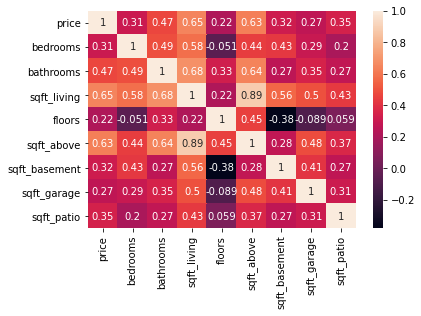

In [23]:
sns.heatmap(df_numeric.corr(), annot=True);

In [25]:
df_numeric_clean = df_numeric.drop(['sqft_above'], axis =1).copy()

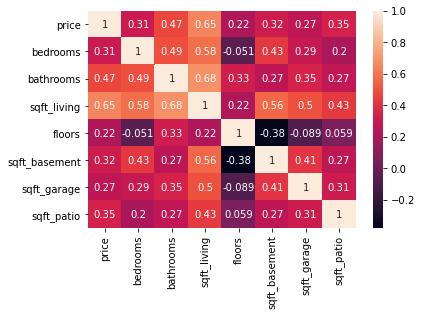

In [26]:
sns.heatmap(df_numeric_clean.corr(), annot=True);

## Baseline Multi-Linear Regression Model<a class="anchor" id="5.5"></a>

Now that our data has been cleaned, we have our improved simple linear regression model, and we have dropped features that are highly correlated in an attempt to reduce multicollinearity, we can check our results using multi-linear regression. 

To compare the multi-linear regression models and find the absolute best fit, we use the function, `multi_num_model_all_combos`, found in the included .py file. This function runs a multi-linear regression model for all combinations of predictor features in a given dataframe against the specified target feature. 

We found that the combination of 6 of the remaining predictor variables has the third highest adjusted R-squared value (.441) and all coefficient p-values are statistically significant. We will be using these variables from now on as we move forward.

We did not choose the absolute highest adjusted R-squared value because not all p-values are statistically significant in the model and they have nearly identical adjusted R-squared values.

In [27]:
multi_df, _ = simple_test.multi_num_model_all_combos(df_numeric_clean, 'price')

The top three combos are: 
    - ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_garage', 'sqft_patio'] 
    	- adj_r2: 0.4414878448719707 
    	- ratio of p-vals <.05: 85.71428571428571
    - ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_basement', 'sqft_garage', 'sqft_patio'] 
    	- adj_r2: 0.4414448996992014, 
    	- ratio of p-vals <.05: 75.0
    - ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio'] 
    	- adj_r2: 0.44088470964893955, 
    	- ratio of p-vals <.05: 100.0


In [28]:
multi_df.head(5)

,index,column,r2,r2_adj,f_stat_p_val,const_coefs,const_p_val,%p_val < .05,MAE,RMSE
0,121,"[bedrooms, bathrooms, sqft_living, floors, sqf...",0.441948,0.441488,0,55794.5,0.125,85.7143,388887,556853
1,126,"[bedrooms, bathrooms, sqft_living, floors, sqf...",0.441982,0.441445,0,69917.3,0.097,75,388919,556836
2,122,"[bedrooms, bathrooms, sqft_living, sqft_baseme...",0.441346,0.440885,0,149331,0,100,389756,557154
3,103,"[bedrooms, bathrooms, sqft_living, sqft_garage...",0.440768,0.440384,0,129988,0,100,390113,557442
4,110,"[bedrooms, sqft_living, floors, sqft_garage, s...",0.440415,0.44003,0,75233.1,0.0374,100,388924,557618


In [29]:
for i in range(5):
    print(multi_df['column'][i])

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_garage', 'sqft_patio']
['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_basement', 'sqft_garage', 'sqft_patio']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_garage', 'sqft_patio']
['bedrooms', 'sqft_living', 'floors', 'sqft_garage', 'sqft_patio']


In [30]:
y=df_numeric_clean['price']
X = df_numeric_clean[['bedrooms', 'bathrooms', 'sqft_living', 
                      'sqft_basement', 'sqft_garage', 'sqft_patio']]

results = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     957.2
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:23:42   Log-Likelihood:            -1.0660e+05
No. Observations:                7277   AIC:                         2.132e+05
Df Residuals:                    7270   BIC:                         2.133e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.493e+05   3.19e+04      4.688      0.000    8.69e+04    2.12e+05
bedrooms      -8.311e+04   9320.198     -8.917      0.000   -1.01e+05   -6.48e+04
bathrooms      6.056e+04   1.16e+04      5.212      0.000    3.78e+04    8.33e+04
sqft_living     561.6986     12.931     43.438      0.000     536.350     587.047
sqft_basement   -57.2036     20.870     -2.741      0.006     -98.115     -16.292
sqft_garage    -334.4221     43.203     -7.741      0.000    -419.113    -249.731
sqft_patio      286.9191     31.964      8.976      0.000     224.261     349.577
==============================================================================
Omnibus:                     2129.299   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12331.497
Skew:                           1.276   Prob(JB):                         0.00
Kurtosis:                       8.844   Cond. No.                     1.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Results of model:
- Our model explains about 44.1% of the variance in our data
- Our models F-statistic is statatistically significant compared to our alpha of 0.05
- All coefficient are statistically significant when compared to our alpha of .05

Interpretations:
- For a house with no `bedrooms`, `bathrooms`, `sqft_living`, `sqft_basement`, `sqft_garage`, or `sqft_patio` we would expect the house to be valued about \\$150,000
- For each additional bedroom and all other features remaining zero, we would expect the home to lose value of about \\$83,000
- For each additional 1 square foot in living space size and all other features remaining zero, we would expect the house to gain about \\$560
- For each additional 1 square foot in basement size and all other features remaining zero, we would expect the house to lose about \\$57
- For each additional 1 square foot in garage size and all other features remaining zero, we would expect the house to lose about \\$335
- For each additional 1 square foot in patio size and all other features remaining zero, we would expect the house to gain about \\$290

## Standardizing the Data to Determine Importance<a class="anchor" id="5.6"></a>

Since our data includes variables of different scale, we need to standardize our model to determine importance. Once standardized, we can check the coefficients of our predictor variables with the highest coefficient indicating the feature with the greatest impact to the model and in turn, home value.

After standardizing our dataset, we are able to see that `sqft_living` has the highest coefficient (.68) with the number of `bedrooms` coming in second (-.1).

In [31]:
# df_standardized = df_numeric.drop(['price'], axis=1).copy()
df_standardized = df_numeric_clean.copy()


for col in df_standardized:
    df_standardized[col] = (df_standardized[col] - df_standardized[col].mean())\
                            / df_standardized[col].std()
    
df_standardized.describe()

,price,bedrooms,bathrooms,sqft_living,floors,sqft_basement,sqft_garage,sqft_patio
count,7.277000e+03,7.277000e+03,7.277000e+03,7.277000e+03,7.277000e+03,7.277000e+03,7.277000e+03,7.277000e+03
mean,6.346747e-18,-1.171707e-17,1.757561e-17,1.430459e-16,3.319837e-17,8.055487e-17,1.288878e-16,-1.083829e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.497667e+00,-1.827842e+00,-3.368540e+00,-1.862547e+00,-8.062569e-01,-2.457343e+00,-2.361694e+00,-1.262631e+00
25%,-6.658418e-01,-7.050932e-01,-8.735283e-01,-7.460151e-01,-8.062569e-01,-7.355767e-01,-7.445910e-01,-7.823992e-01
50%,-3.170710e-01,4.176559e-01,-2.497754e-01,-2.374955e-01,-8.062569e-01,-1.193581e-02,-1.968266e-02,-2.585104e-01
75%,3.737633e-01,4.176559e-01,3.739774e-01,5.695030e-01,9.735494e-01,6.118926e-01,4.821770e-01,4.836654e-01
max,7.483320e+00,2.663154e+00,8.482765e+00,4.040702e+00,4.533162e+00,3.431597e+00,4.385530e+00,4.674776e+00


In [32]:
y=df_standardized['price']
X = df_standardized[['bedrooms', 'bathrooms', 'sqft_living',
                     'sqft_basement', 'sqft_garage', 'sqft_patio']]

results = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     957.2
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:24:11   Log-Likelihood:                -8206.7
No. Observations:                7277   AIC:                         1.643e+04
Df Residuals:                    7270   BIC:                         1.648e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.355e-17      0.009   1.55e-15      1.000      -0.017       0.017
bedrooms         -0.0993      0.011     -8.917      0.000      -0.121      -0.077
bathrooms         0.0651      0.012      5.212      0.000       0.041       0.090
sqft_living       0.6816      0.016     43.438      0.000       0.651       0.712
sqft_basement    -0.0308      0.011     -2.741      0.006      -0.053      -0.009
sqft_garage      -0.0804      0.010     -7.741      0.000      -0.101      -0.060
sqft_patio        0.0882      0.010      8.976      0.000       0.069       0.107
==============================================================================
Omnibus:                     2129.299   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12331.497
Skew:                           1.276   Prob(JB):                         0.00
Kurtosis:                       8.844   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking Partial Regression Plots for our Model<a class="anchor" id="5.7"></a>

Now we can check partial regression plots for our model. The goal is to show the marginal contribution of each particular predictor. These models visualize the slope of the coefficient in our standardized model. Those with a higher absolute value of the slope have a larger impact on our modeling.

We can see that each plot shows a linear relationship with a non-zero slope, indicating that it is beneficial to add each of these features to the model.

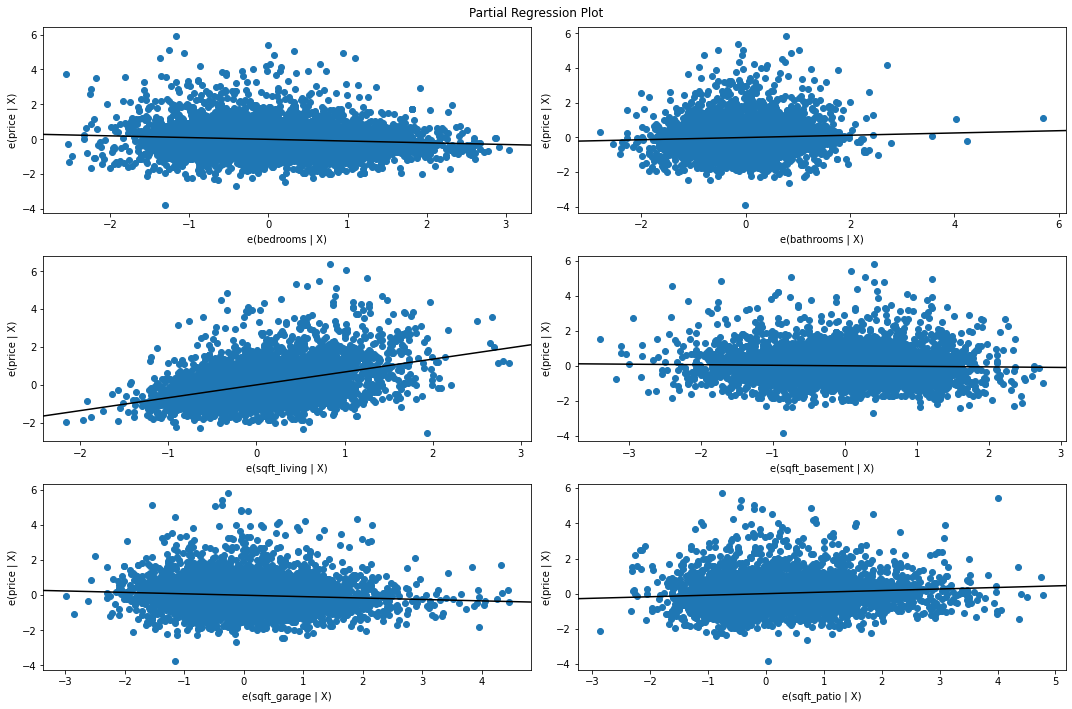

In [33]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(results, 
                                  exog_idx=['bedrooms', 'bathrooms', 
                                            'sqft_living', 'sqft_basement',
                                            'sqft_garage', 'sqft_patio'], fig=fig
                                 )
plt.tight_layout()
plt.show()

## Checking for Linearity and Normal Distributions<a class="anchor" id="5.8"></a>

Now that our data is standardized, we also run a scattermatrix of the variables to get a better visual representation of what we're working with and to ensure that our data is as normal and linear as possible.

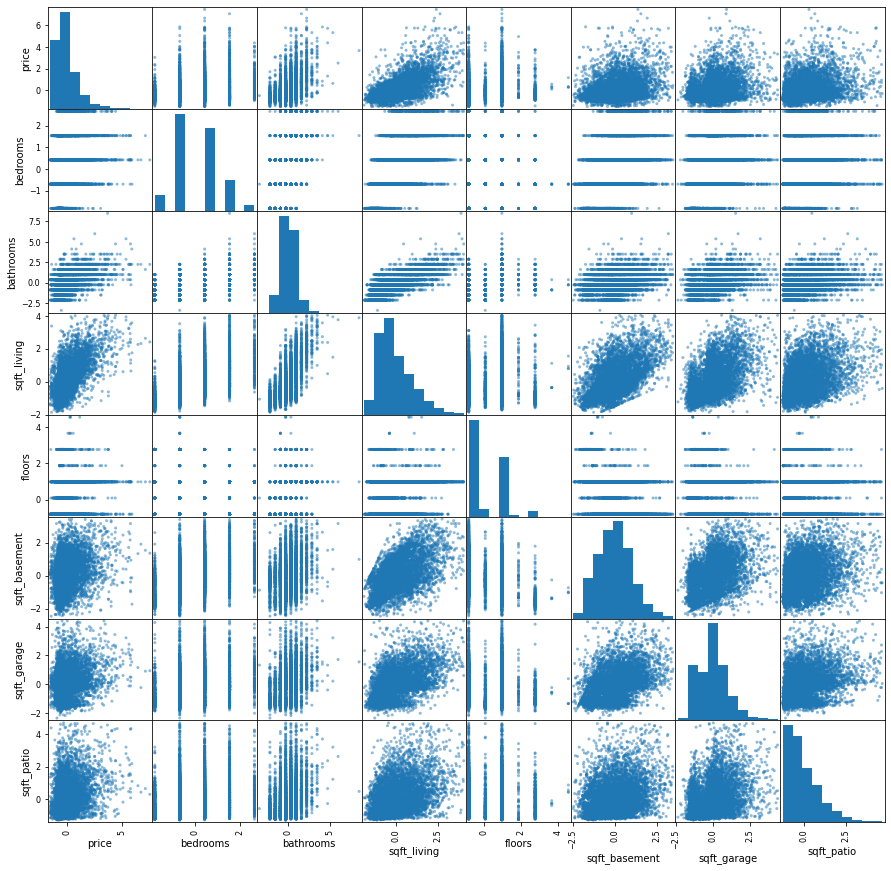

In [34]:
# Looking at a scatter matrix of just continuous numerical data
pd.plotting.scatter_matrix(df_standardized,figsize  = [15, 15]);

### Log-Scaling all of the Predictor Variables<a class="anchor" id="5.8.1"></a>

In an attempt to improve the linearity and normalcy of our dataset, we log all of our predictor values and run the scattermatrix to compare to our previously standardized data. 

Our data is much less linear than before scaling and we are unable to run our model for any of the predictor variables due to `NaN`s that appeared after taking the log of our predictor variables. This is not a good approach and we will not be prusuing this.

In [35]:
X_log = df_standardized.copy()
X_log = X_log.drop(['price'], axis=1)
X_log_dropped = X_log.copy()

for col in X_log_dropped:
    X_log_dropped[f'log({col})'] = np.log(X_log_dropped[col])
    X_log_dropped.drop([col], axis=1, inplace=True)

# Adding price back into newly logged dataframe
X_log_dropped['price'] = df_numeric_clean['price'].copy()
X_log_dropped

,log(bedrooms),log(bathrooms),log(sqft_living),log(floors),log(sqft_basement),log(sqft_garage),log(sqft_patio),price
3,NaN,-0.98356,NaN,-0.026807,-3.270947,NaN,NaN,775000.0
4,NaN,NaN,NaN,-0.026807,NaN,-0.729444,NaN,592500.0
11,-0.873097,-0.98356,NaN,NaN,-2.181874,NaN,NaN,680000.0
16,NaN,NaN,-3.247433,NaN,-0.451228,-0.992490,NaN,1318000.0
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,785000.0
...,...,...,...,...,...,...,...,...
30142,-0.873097,NaN,NaN,NaN,-0.491199,NaN,NaN,880000.0
30144,NaN,NaN,NaN,1.012820,NaN,NaN,-1.326598,729950.0
30149,NaN,NaN,NaN,-0.026807,NaN,NaN,NaN,719000.0
30152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800000.0


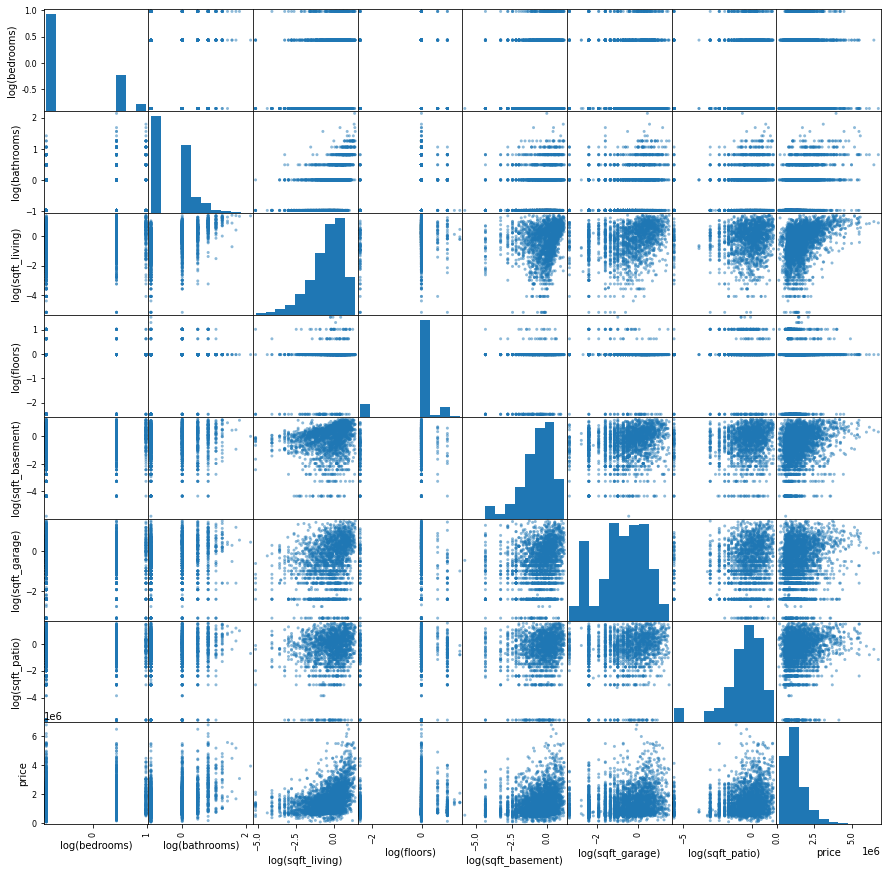

In [36]:
pd.plotting.scatter_matrix(X_log_dropped,figsize  = [15, 15]);

### Log-Scaling Target and Predictor Variables<a class="anchor" id="5.8.2"></a>

Since log-scaling the standardized predictor variables did not yield positive results for our model, we attempted to log-scale the non-standardized version of our data. Our goal was to improve normality and increase the linear relationship.

In order to run the model, we needed to drop the few `inf` and `-inf` values that appeared in our data. After running the model, it was determined that log-scaling the target and predictor variables still cause skew and kurtosis and ultimately reduces the effectiveness of the model with an adjusted R-squared value of 0.39. We will not be pursuing this method.

In [37]:
X_log = df_numeric_clean.copy()
X_log_dropped = X_log.copy()

for col in X_log_dropped:
    X_log_dropped[f'log({col})'] = np.log(X_log_dropped[col])
    X_log_dropped.drop([col], axis=1, inplace=True)

# Adding price back into newly logged dataframe
X_log_dropped

,log(price),log(bedrooms),log(bathrooms),log(sqft_living),log(floors),log(sqft_basement),log(sqft_garage),log(sqft_patio)
3,13.560618,1.098612,1.098612,7.677864,0.693147,6.975414,5.298317,5.598422
4,13.292106,0.693147,0.693147,7.021084,0.693147,6.309918,6.309918,3.401197
11,13.429848,1.386294,1.098612,7.663877,0.000000,7.003065,6.086775,5.634790
16,14.091626,1.098612,0.916291,7.791523,0.000000,7.177782,6.272877,4.867534
24,13.573439,1.098612,0.916291,7.506592,0.000000,6.756932,5.768321,4.941642
...,...,...,...,...,...,...,...,...
30142,13.687677,1.386294,0.916291,7.723120,0.000000,7.170120,6.131226,5.438079
30144,13.500731,0.693147,0.693147,7.162397,1.098612,5.886104,5.521461,5.886104
30149,13.485617,1.098612,0.916291,7.146772,0.693147,6.040255,5.298317,4.094345
30152,13.592367,1.098612,0.693147,7.390181,0.000000,6.824374,5.480639,4.700480


In [38]:
np.isinf(X_log_dropped).values.sum()

1

In [39]:
X_log_dropped = X_log_dropped.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [40]:
log_test, _ = simple_test.multi_num_model_all_combos(X_log_dropped, 'log(price)')

The top three combos are: 
    - ['log(bedrooms)', 'log(sqft_living)', 'log(floors)', 'log(sqft_basement)', 'log(sqft_garage)', 'log(sqft_patio)'] 
    	- adj_r2: 0.3829952201716097 
    	- ratio of p-vals <.05: 100.0
    - ['log(bedrooms)', 'log(sqft_living)', 'log(floors)', 'log(sqft_garage)', 'log(sqft_patio)'] 
    	- adj_r2: 0.382715845300433, 
    	- ratio of p-vals <.05: 100.0
    - ['log(sqft_living)', 'log(floors)', 'log(sqft_basement)', 'log(sqft_garage)', 'log(sqft_patio)'] 
    	- adj_r2: 0.38011340830633433, 
    	- ratio of p-vals <.05: 83.33333333333334


In [41]:
log_test.head(3)

,index,column,r2,r2_adj,f_stat_p_val,const_coefs,const_p_val,%p_val < .05,MAE,RMSE
0,62,"[log(bedrooms), log(sqft_living), log(floors),...",0.383504,0.382995,0,7.3785,0,100,0.322894,0.420265
1,58,"[log(bedrooms), log(sqft_living), log(floors),...",0.38314,0.382716,0,7.4189,0,100,0.323165,0.420389
2,61,"[log(sqft_living), log(floors), log(sqft_basem...",0.380539,0.380113,0,7.7157,0,83.3333,0.323855,0.421274


In [42]:
for i in range(3):
    print(log_test['column'][i])

['log(bedrooms)', 'log(sqft_living)', 'log(floors)', 'log(sqft_basement)', 'log(sqft_garage)', 'log(sqft_patio)']
['log(bedrooms)', 'log(sqft_living)', 'log(floors)', 'log(sqft_garage)', 'log(sqft_patio)']
['log(sqft_living)', 'log(floors)', 'log(sqft_basement)', 'log(sqft_garage)', 'log(sqft_patio)']


In [43]:
y_log = X_log_dropped['log(price)']
X = X_log_dropped[['log(bedrooms)', 'log(sqft_living)', 'log(floors)', 
                   'log(sqft_basement)', 'log(sqft_garage)', 'log(sqft_patio)']]

log_model = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     786.5
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:24:50   Log-Likelihood:                -8505.1
No. Observations:                7277   AIC:                         1.702e+04
Df Residuals:                    7270   BIC:                         1.707e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.7218      0.231    -55.033      0.000     -13.175     -12.269
log(bedrooms)         -0.3310      0.048     -6.896      0.000      -0.425      -0.237
log(sqft_living)       1.7142      0.046     36.891      0.000       1.623       1.805
log(floors)            0.3018      0.034      8.823      0.000       0.235       0.369
log(sqft_basement)     0.0303      0.033      0.930      0.352      -0.034       0.094
log(sqft_garage)      -0.1525      0.027     -5.732      0.000      -0.205      -0.100
log(sqft_patio)        0.1010      0.012      8.212      0.000       0.077       0.125
==============================================================================
Omnibus:                     2442.302   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14062.897
Skew:                           1.492   Prob(JB):                         0.00
Kurtosis:                       9.122   Cond. No.                         340.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Log-Scaling the Target Variable<a class="anchor" id="5.8.3"></a>

Since we were not succesful when log-scaling the isolated predictor variables or when log-scaling target and predictor variables together, we will take a look at changes to the relationship when we log-scale just the target variable.

After log-scaling our target varible, the simple-linear model had a worse R-squared value (.374) than our baseline model and the multi-linear model was unchanged from our baseline. As such, we will not pursue logging our target variable since it adds no value to our model.

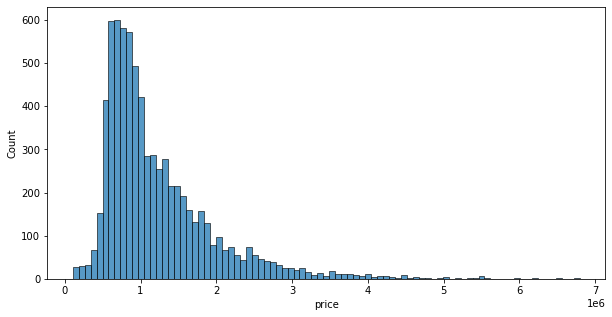

In [44]:
fig, ax = plt.subplots(figsize = (10,5))
sns.histplot(df_numeric_clean['price'], bins = int(np.sqrt(len(df_numeric_clean['price']))));

In [45]:
y_log = np.log(df_numeric_clean['price'])
X = df_numeric_clean[['sqft_living']]

log_model = sm.OLS(y_log, sm.add_constant(X)).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     4347.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:24:59   Log-Likelihood:                -4072.9
No. Observations:                7277   AIC:                             8150.
Df Residuals:                    7275   BIC:                             8164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0037      0.014    928.804      0.000      12.976      13.031
sqft_living     0.0004   5.49e-06     65.931      0.000       0.000       0.000
==============================================================================
Omnibus:                      671.687   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1574.542
Skew:                          -0.562   Prob(JB):                         0.00
Kurtosis:                       4.982   Cond. No.                     7.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
y_log = np.log(df_numeric_clean['price'])
X = df_numeric_clean[['bedrooms', 'bathrooms', 'sqft_living', 
                      'sqft_basement', 'sqft_garage', 'sqft_patio']]

log_model = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     957.2
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:25:04   Log-Likelihood:                -8206.7
No. Observations:                7277   AIC:                         1.643e+04
Df Residuals:                    7270   BIC:                         1.648e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.4381      0.043    -33.652      0.000      -1.522      -1.354
bedrooms         -0.1115      0.013     -8.917      0.000      -0.136      -0.087
bathrooms         0.0812      0.016      5.212      0.000       0.051       0.112
sqft_living       0.0008   1.73e-05     43.438      0.000       0.001       0.001
sqft_basement -7.673e-05    2.8e-05     -2.741      0.006      -0.000   -2.19e-05
sqft_garage      -0.0004    5.8e-05     -7.741      0.000      -0.001      -0.000
sqft_patio        0.0004   4.29e-05      8.976      0.000       0.000       0.000
==============================================================================
Omnibus:                     2129.299   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12331.497
Skew:                           1.276   Prob(JB):                         0.00
Kurtosis:                       8.844   Cond. No.                     1.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Categorical Data<a class="anchor" id="6.1"></a>

Now that we have good baseline simple and multi-linear regressions for our numerical data, we can begin to look at our categorical data and model the results.

## Setting up the Categorical DataFrame<a class="anchor" id="6.2"></a>

First, we set up a categorical dataframe to prepare all of our data for easy access through the analysis.

In [47]:
# Creating basic cat df based on dtype
df_cat = df_dropped_no_outliers.select_dtypes(object)

In [48]:
df_cat.head()

,nuisance,condition,grade,heat_source
3,NO,Average,9 Better,Gas
4,YES,Average,7 Average,Electricity
11,NO,Very Good,7 Average,Electricity
16,NO,Average,8 Good,Gas
24,YES,Average,7 Average,Gas


## Running Models with Categorical Data<a class="anchor" id="6.3"></a>

Now that we have our categorical data in place, we can begind running models on each of the categorical datasets. To better compare each run, we use the function: `base_check_for_category`, found in the included .py file. This function runs a one-hot encoded multi-linear regression for the specified categorical feature in conjunction with the highest correlated numerical feature `sqft_living`.

In [49]:
# Adding price and sq_ft living into the categorical dataframe for the function to run properly
df_cat['price'] = df_dropped['price']
df_cat['sqft_living'] = df_dropped['sqft_living']

### Modeling Nuisance<a class="anchor" id="6.3.1"></a>

The results of our nuisance model are not beneficial to our overall model and have an adjusted R-squared value equal to simple linear-regression model.

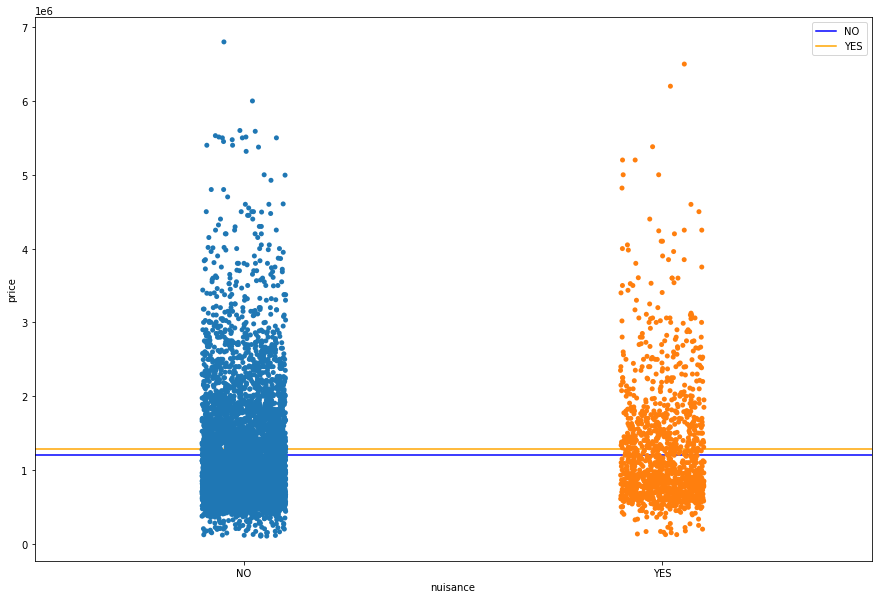

In [50]:
nuisance_stats, nuisance_results, nuisance_summary = simple_test.base_check_for_category(df_cat, 'nuisance')

In [51]:
nuisance_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     2672.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:25:47   Log-Likelihood:            -1.0672e+05
No. Observations:                7277   AIC:                         2.134e+05
Df Residuals:                    7274   BIC:                         2.135e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.218e+04    1.9e+04     -3.798      0.000   -1.09e+05   -3.49e+04
sqft_living    535.4773      7.338     72.975      0.000     521.093     549.862
nuisance_YES  9.609e+04   1.76e+04      5.463      0.000    6.16e+04    1.31e+05
==============================================================================
Omnibus:                     2148.199   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11984.246
Skew:                           1.301   Prob(JB):                         0.00
Kurtosis:                       8.723   Cond. No.                     7.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Modeling House Condition<a class="anchor" id="6.3.2"></a>

The results of our house condition model are not beneficial to our overall model and have an adjusted R-squared value equal to simple linear-regression model.

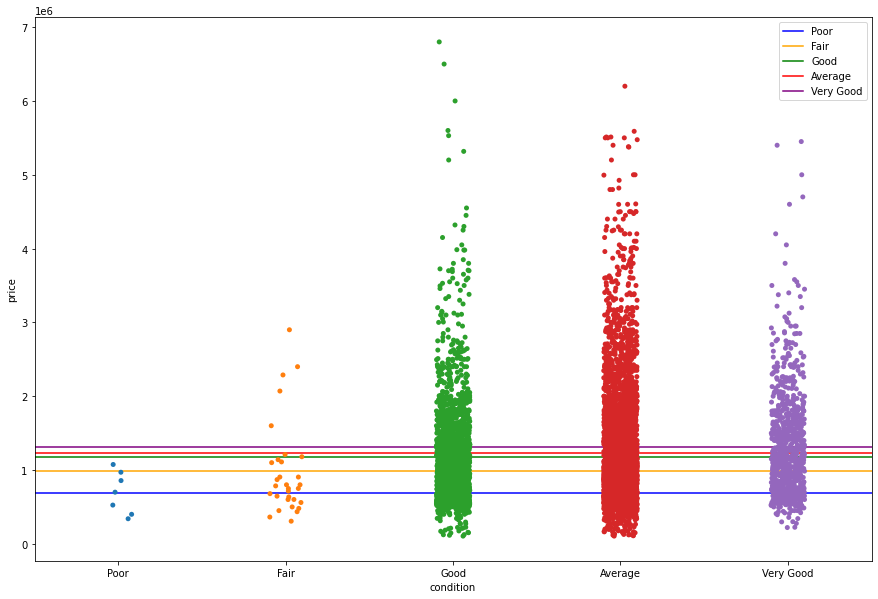

In [52]:
condition_stats, condition_results, condition_summary = simple_test.base_check_for_category(df_cat, 'condition')

In [53]:
condition_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     1066.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:25:51   Log-Likelihood:            -1.0672e+05
No. Observations:                7277   AIC:                         2.135e+05
Df Residuals:                    7271   BIC:                         2.135e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -5.459e+04   1.96e+04     -2.785      0.005    -9.3e+04   -1.62e+04
sqft_living           534.5092      7.350     72.721      0.000     520.101     548.918
condition_Fair       9.013e+04   1.02e+05      0.882      0.378    -1.1e+05     2.9e+05
condition_Good      -2.909e+04   1.52e+04     -1.909      0.056    -5.9e+04     786.629
condition_Poor      -3.054e+05   2.14e+05     -1.425      0.154   -7.25e+05    1.15e+05
condition_Very Good  7.909e+04   2.12e+04      3.723      0.000    3.74e+04    1.21e+05
==============================================================================
Omnibus:                     2169.028   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12245.730
Skew:                           1.311   Prob(JB):                         0.00
Kurtosis:                       8.789   Cond. No.                     8.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Modeling Heatsource<a class="anchor" id="6.3.3"></a>

The results of our heatsource model are not beneficial to our overall model and have an adjusted R-squared value equal to simple linear-regression model.

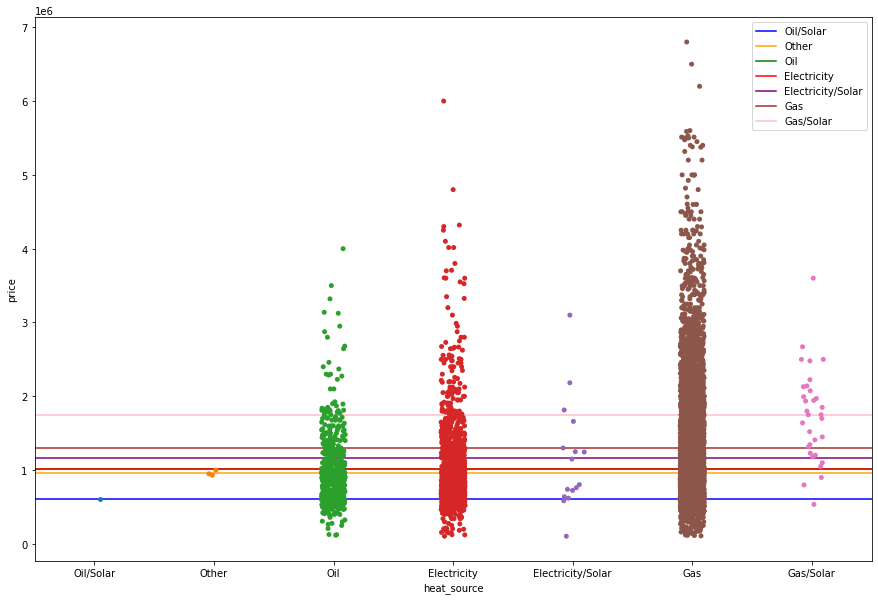

In [54]:
heat_stats, heat_results, heat_summary = simple_test.base_check_for_category(df_cat, 'heat_source')

In [55]:
heat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     761.8
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:25:54   Log-Likelihood:            -1.0672e+05
No. Observations:                7277   AIC:                         2.135e+05
Df Residuals:                    7269   BIC:                         2.135e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1.001e+05   2.18e+04     -4.592      0.000   -1.43e+05   -5.74e+04
sqft_living                     529.8280      7.532     70.348      0.000     515.064     544.592
heat_source_Electricity/Solar  9.133e+04   1.42e+05      0.641      0.521   -1.88e+05     3.7e+05
heat_source_Gas                    7e+04   1.71e+04      4.083      0.000    3.64e+04    1.04e+05
heat_source_Gas/Solar          3.296e+05   1.01e+05      3.251      0.001    1.31e+05    5.28e+05
heat_source_Oil                7.905e+04   2.88e+04      2.748      0.006    2.27e+04    1.35e+05
heat_source_Oil/Solar          1.217e+05   5.67e+05      0.215      0.830   -9.89e+05    1.23e+06
heat_source_Other             -2.602e+05   3.27e+05     -0.795      0.427   -9.02e+05    3.82e+05
==============================================================================
Omnibus:                     2173.983   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12278.042
Skew:                           1.315   Prob(JB):                         0.00
Kurtosis:                       8.795   Cond. No.                     2.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Modeling House Grade<a class="anchor" id="6.3.4"></a>

The results of our house grade model are beneficial to our overall model and have an adjusted R-squared value well above even our previous multi-linear regression model, coming in with an adjusted R-squared of .52.

We will use this categorical feature in our final modeling.

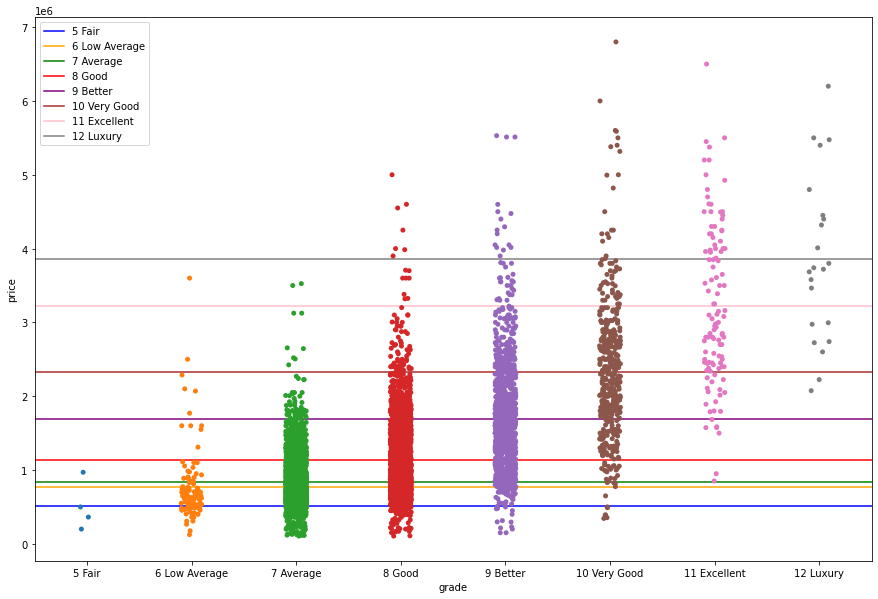

In [56]:
grade_stats, grade_results, grade_summary = simple_test.base_check_for_category(df_cat, 'grade')

In [57]:
grade_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     994.7
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:25:57   Log-Likelihood:            -1.0603e+05
No. Observations:                7277   AIC:                         2.121e+05
Df Residuals:                    7268   BIC:                         2.121e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.159e+06   4.27e+04     27.121      0.000    1.08e+06    1.24e+06
sqft_living           303.9044      9.114     33.344      0.000     286.038     321.771
grade_11 Excellent   7.152e+05    5.5e+04     12.997      0.000    6.07e+05    8.23e+05
grade_12 Luxury      1.291e+06   1.13e+05     11.442      0.000    1.07e+06    1.51e+06
grade_5 Fair        -9.531e+05    2.6e+05     -3.664      0.000   -1.46e+06   -4.43e+05
grade_6 Low Average -8.538e+05    5.9e+04    -14.475      0.000   -9.69e+05   -7.38e+05
grade_7 Average     -8.921e+05   3.19e+04    -27.987      0.000   -9.55e+05    -8.3e+05
grade_8 Good        -7.183e+05      3e+04    -23.947      0.000   -7.77e+05    -6.6e+05
grade_9 Better      -3.903e+05   2.98e+04    -13.086      0.000   -4.49e+05   -3.32e+05
==============================================================================
Omnibus:                     2173.797   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14192.264
Skew:                           1.268   Prob(JB):                         0.00
Kurtosis:                       9.354   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Modeling Numerical Data and Categorical Data<a class="anchor" id="7.1"></a>

## Non-Standardized Model<a class="anchor" id="7.2"></a>

Now that we have determined the numerical and categorical features with the greatest impact to the relevance of our model, we can add them together for our final model.

We have also calculated mean absolute error to better interpret our model.

In [58]:
# Creating a dataframe with the necessary features from prior modeling
df_best_nums = df_numeric_clean[['bedrooms', 'bathrooms', 
                                 'sqft_living', 'sqft_basement', 
                                 'sqft_garage', 'sqft_patio', 'price']].copy()

df_best_nums['grade'] = df_cat['grade'].copy()

In [59]:
df_best_nums.head()

,bedrooms,bathrooms,sqft_living,sqft_basement,sqft_garage,sqft_patio,price,grade
3,3,3.0,2160,1070,200,270,775000.0,9 Better
4,2,2.0,1120,550,550,30,592500.0,7 Average
11,4,3.0,2130,1100,440,280,680000.0,7 Average
16,3,2.5,2420,1310,530,130,1318000.0,8 Good
24,3,2.5,1820,860,320,140,785000.0,7 Average


In [60]:
# setting up a model for all chosen features
y = df_best_nums['price']
X_cat = pd.get_dummies(df_best_nums.drop(['price'], axis=1), columns=['grade'])
X_cat = X_cat.drop(['grade_5 Fair'], axis=1)

cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
cat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     634.5
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:26:21   Log-Likelihood:            -1.0596e+05
No. Observations:                7277   AIC:                         2.120e+05
Df Residuals:                    7263   BIC:                         2.120e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.943e+05   2.56e+05      1.149      0.251   -2.08e+05    7.96e+05
bedrooms            -2155.5612   8836.403     -0.244      0.807   -1.95e+04    1.52e+04
bathrooms            1.607e+04   1.09e+04      1.476      0.140   -5278.800    3.74e+04
sqft_living           288.1417     14.182     20.317      0.000     260.340     315.943
sqft_basement          97.9557     19.777      4.953      0.000      59.187     136.725
sqft_garage          -414.1231     39.725    -10.425      0.000    -491.996    -336.251
sqft_patio            171.3467     29.484      5.812      0.000     113.550     229.144
grade_10 Very Good   9.276e+05   2.58e+05      3.594      0.000    4.22e+05    1.43e+06
grade_11 Excellent   1.638e+06   2.62e+05      6.247      0.000    1.12e+06    2.15e+06
grade_12 Luxury       2.22e+06    2.8e+05      7.932      0.000    1.67e+06    2.77e+06
grade_6 Low Average  1.999e+04    2.6e+05      0.077      0.939    -4.9e+05     5.3e+05
grade_7 Average      1.015e+04   2.56e+05      0.040      0.968   -4.91e+05    5.12e+05
grade_8 Good         1.824e+05   2.56e+05      0.712      0.476   -3.19e+05    6.84e+05
grade_9 Better       5.194e+05   2.57e+05      2.023      0.043    1.61e+04    1.02e+06
==============================================================================
Omnibus:                     2214.917   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15205.738
Skew:                           1.280   Prob(JB):                         0.00
Kurtosis:                       9.603   Cond. No.                     3.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
mean_absolute_error(y, cat_results.predict(sm.add_constant(X_cat)))

353782.5540068308

## Standardizing the Final Model<a class="anchor" id="7.3"></a>

Since our data includes variables of different scale, we need to standardize our model to determine importance. Once standardized, we can check the coefficients of our predictor variables with the highest coefficient indicating the feature with the greatest impact to the model and in turn, home value.

After standardizing our dataset, we are able to see that sqft_living has the highest coefficient (.35).

In [62]:
df_best_standardized = df_best_nums.copy()
df_best_standardized = df_best_standardized.drop(['grade'], axis=1)

for col in df_best_standardized:
    df_best_standardized[col] = (df_best_standardized[col] - df_best_standardized[col].mean())\
                                / df_best_standardized[col].std()
    
df_best_standardized.describe()

,bedrooms,bathrooms,sqft_living,sqft_basement,sqft_garage,sqft_patio,price
count,7.277000e+03,7.277000e+03,7.277000e+03,7.277000e+03,7.277000e+03,7.277000e+03,7.277000e+03
mean,-1.171707e-17,1.757561e-17,1.430459e-16,8.055487e-17,1.288878e-16,-1.083829e-16,6.346747e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.827842e+00,-3.368540e+00,-1.862547e+00,-2.457343e+00,-2.361694e+00,-1.262631e+00,-1.497667e+00
25%,-7.050932e-01,-8.735283e-01,-7.460151e-01,-7.355767e-01,-7.445910e-01,-7.823992e-01,-6.658418e-01
50%,4.176559e-01,-2.497754e-01,-2.374955e-01,-1.193581e-02,-1.968266e-02,-2.585104e-01,-3.170710e-01
75%,4.176559e-01,3.739774e-01,5.695030e-01,6.118926e-01,4.821770e-01,4.836654e-01,3.737633e-01
max,2.663154e+00,8.482765e+00,4.040702e+00,3.431597e+00,4.385530e+00,4.674776e+00,7.483320e+00


In [63]:
# setting up a standardized model for all chosen features 
df_best_standardized['grade'] = df_best_nums['grade'].copy()

y = df_best_standardized['price']
X_cat = pd.get_dummies(df_best_standardized.drop(['price'], axis=1), columns=['grade'])
X_cat = X_cat.drop(['grade_5 Fair'], axis=1)

standard_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
standard_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     634.5
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:26:38   Log-Likelihood:                -7564.4
No. Observations:                7277   AIC:                         1.516e+04
Df Residuals:                    7263   BIC:                         1.525e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3243      0.343     -0.945      0.345      -0.997       0.348
bedrooms               -0.0026      0.011     -0.244      0.807      -0.023       0.018
bathrooms               0.0173      0.012      1.476      0.140      -0.006       0.040
sqft_living             0.3496      0.017     20.317      0.000       0.316       0.383
sqft_basement           0.0527      0.011      4.953      0.000       0.032       0.074
sqft_garage            -0.0996      0.010    -10.425      0.000      -0.118      -0.081
sqft_patio              0.0526      0.009      5.812      0.000       0.035       0.070
grade_10 Very Good      1.2443      0.346      3.594      0.000       0.566       1.923
grade_11 Excellent      2.1969      0.352      6.247      0.000       1.508       2.886
grade_12 Luxury         2.9778      0.375      7.932      0.000       2.242       3.714
grade_6 Low Average     0.0268      0.349      0.077      0.939      -0.657       0.711
grade_7 Average         0.0136      0.343      0.040      0.968      -0.659       0.686
grade_8 Good            0.2446      0.343      0.712      0.476      -0.428       0.918
grade_9 Better          0.6967      0.344      2.023      0.043       0.022       1.372
==============================================================================
Omnibus:                     2214.917   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15205.738
Skew:                           1.280   Prob(JB):                         0.00
Kurtosis:                       9.603   Cond. No.                         214.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Results<a class="anchor" id="8.1"></a>

- Our final model explains about 53.1% of the variance in the data overall.
- Our model is statistically significant when compareed to our alpha = 0.05.
- P-values for `sqft_living`, `sqft_basement`, `sqft_garage`, and `sqft_patio` are statistically significant.
- p-values for 3 of the 7 grades are statistically significant.
- The MAE for our final model indicates potential variance of about $354,000 dollars

## Interpretation<a class="anchor" id="8.2"></a>

**Importance:**
- When looking at the standardized model, we see that `sqft_living` has the highest coefficient.
    - This means that increasing square foot living area will have the most drastic change to house price and should be prioritized during renovation.

**Changes in Numerical Variables:**
- When we look at our non-standardized final model, we can get additional insight:
    - given a 'Fair' quality house with everything else being zero, we would expect the house to be priced about \\$294,000
        - For every 100 sq ft increase in living area, we would expect the house value to increase by about \\$29,000

**Changes in Categorical Variables:**
- We see statistically significant coefficients for building grade and when compared to a house with a grade of Fair:
    - 'Very Good' quality improvements would increase home value by about \\$930,000
    - 'Excellent' quality improvements would increase home value by about \\$1,640,000
    - 'Luxury' quality improvements would increase home value by about \\$2,220,000

## Recommendations<a class="anchor" id="8.3"></a>

- We recommend increasing the living area square footage of a home as the greatest impact to the renovation.

- We recommend spending the extra dollars during renovation for quality craftsmanship. Increasing the grade of a home is shown to pay off in the long run with vastly greater home values than homes with lower grades.

## Limitations<a class="anchor" id="8.4"></a>

- Our data was only for homes sold between June of 2021 and June of 2022, given the state of the realty market during this post-pandemic time, its not surprising that there was a lot of unexplained variance in the model. 
    - With more data from years prior to the pandemic, we believe that would could find a more highly correlated model
- Given the timeframe for this report, we were not able to look at features that were not able to be renovated.
    - With more time, we could model additional features to get a better understanding of their impact on variance

# Additional Visualizations<a class="anchor" id="9.1"></a>

We created additional charts to better visualize the relationship between Sqft Living Area and House Price as well as House Grade and Price Increase.

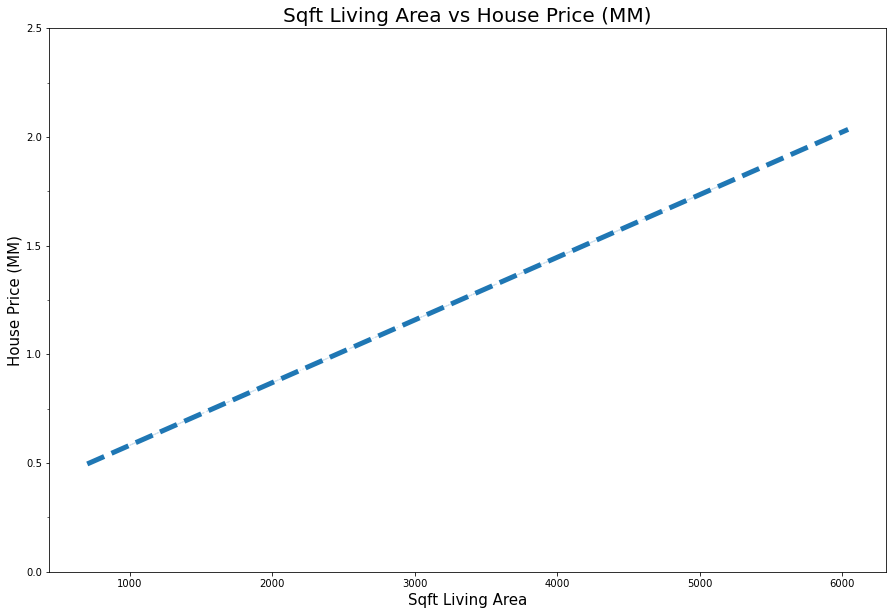

In [73]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(df_best_nums['sqft_living'], (df_best_nums['sqft_living']*288.1417 + cat_results.params[0])/1000000, lw=5, ls='--')
ax.set_title('Sqft Living Area vs House Price (MM)', size=20)
ax.set_xlabel('Sqft Living Area', size=15)
ax.set_ylabel('House Price (MM)', size=15)
ax.set_yticks(list(np.linspace(0, 2.5, 6)))
ax.set_yticks(list(np.linspace(0, 2.25, 10)), minor=True);

In [74]:
const_df = pd.DataFrame(cat_results.params[:1])
plot_df = pd.DataFrame(cat_results.params[7:])
plot_df = pd.concat((const_df, plot_df))
plot_df.rename(columns={0:'original'}, inplace=True)
plot_df['y_values'] = plot_df['original'][1:] + plot_df['original'][0]
plot_df['y_values'][0] = plot_df['original'][:1]
plot_df.reset_index(inplace=True)
plot_df['index'][0] = '5 Fair'
for i, name in enumerate(plot_df['index'][1:]):
    plot_df['index'][i+1] = name[6:]
plot_df = plot_df.sort_values('y_values')
plot_df

,index,original,y_values
0,5 Fair,2.942637e+05,2.942637e+05
5,7 Average,1.014673e+04,3.044105e+05
4,6 Low Average,1.999216e+04,3.142559e+05
6,8 Good,1.823722e+05,4.766360e+05
7,9 Better,5.193551e+05,8.136188e+05
1,10 Very Good,9.275954e+05,1.221859e+06
2,11 Excellent,1.637715e+06,1.931979e+06
3,12 Luxury,2.219863e+06,2.514127e+06


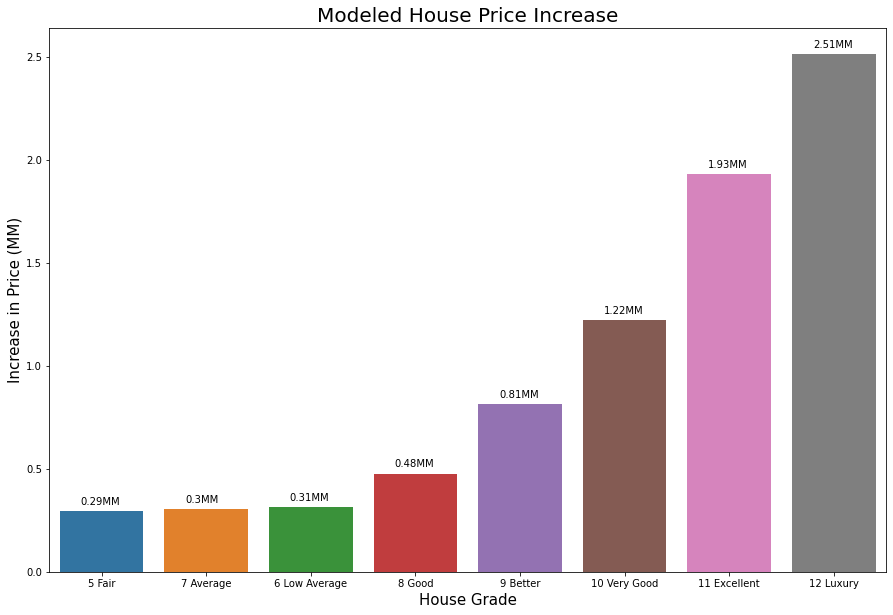

In [75]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(plot_df['index'], plot_df['y_values']/1000000, ax=ax)
ax.set_title('Modeled House Price Increase', size=20)
ax.set_xlabel('House Grade', size=15)
ax.set_ylabel('Increase in Price (MM)', size=15)
for loc, label in enumerate(plot_df['y_values']):
    ax.text(loc-.2, label/1000000+.03, (str((round(label/1000000, ndigits=2))) + 'MM'));